In [1]:
#construct the model by using Keras

In [2]:
#import the packages
import keras
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras.initializers import he_normal
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.utils.data_utils import get_file


In [3]:
#initialize some parameters
num_classes  = 10
batch_size   = 128
epochs       = 10
iterations   = 391
dropout      = 0.5
weight_decay = 0.0001
log_filepath = r'./vgg19_pretrain/'

In [4]:
#load the data
from keras.datasets import cifar10
from keras.utils import np_utils
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(x_test.shape)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# data preprocessing 
x_train[:,:,:,0] = (x_train[:,:,:,0]-123.680)
x_train[:,:,:,1] = (x_train[:,:,:,1]-116.779)
x_train[:,:,:,2] = (x_train[:,:,:,2]-103.939)
x_test[:,:,:,0] = (x_test[:,:,:,0]-123.680)
x_test[:,:,:,1] = (x_test[:,:,:,1]-116.779)
x_test[:,:,:,2] = (x_test[:,:,:,2]-103.939)

print(x_train.shape)
print(x_test.shape)

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
# build model
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block1_conv1', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay),
                 kernel_initializer=he_normal(), name='block1_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

# Block 2
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block2_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block2_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

# Block 3
model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block3_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block3_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block3_conv3'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block3_conv4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

# Block 4
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block4_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block4_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block4_conv3'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block4_conv4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

# Block 5
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block5_conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block5_conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block5_conv3'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                 kernel_initializer=he_normal(), name='block5_conv4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

# model modification for cifar-10
model.add(Flatten(name='flatten'))
model.add(Dense(4096, use_bias = True, kernel_regularizer=keras.regularizers.l2(weight_decay), 
                kernel_initializer=he_normal(), name='fc_cifa10'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(4096, kernel_regularizer=keras.regularizers.l2(weight_decay), 
                kernel_initializer=he_normal(), name='fc2'))  
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))      

model.add(Dense(10, kernel_regularizer=keras.regularizers.l2(weight_decay), 
                kernel_initializer=he_normal(), name='predictions_cifa10'))        
model.add(BatchNormalization())
model.add(Activation('softmax'))

#check the model
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0

In [7]:


import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [8]:


#set the optimizer of our model
from tensorflow.keras import optimizers
sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

C:\Users\prwro\.conda\envs\machineLearning\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [9]:
#set the learining rate
def scheduler(epoch):
    if epoch <= 80:
        return 0.01
    if epoch <= 140:
        return 0.005
    return 0.001

In [10]:
from keras.callbacks import LearningRateScheduler, TensorBoard
from keras.preprocessing.image import ImageDataGenerator

tb_cb = TensorBoard(log_dir=log_filepath, histogram_freq=0)
change_lr = LearningRateScheduler(scheduler)
cbks = [change_lr,tb_cb]

datagen = ImageDataGenerator(horizontal_flip=True,
        width_shift_range=0.125,height_shift_range=0.125,fill_mode='constant',cval=0.)

datagen.fit(x_train)

history = model.fit(datagen.flow(x_train, y_train,batch_size=batch_size),
                    steps_per_epoch=iterations,
                    epochs=epochs,
                    callbacks=cbks,
                    validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 76s 165ms/step - loss: 4.3815 - accuracy: 0.4028 - val_loss: 4.3563 - val_accuracy: 0.4332
Epoch 2/10
391/391 [==============================] - 61s 157ms/step - loss: 3.8624 - accuracy: 0.5878 - val_loss: 3.9112 - val_accuracy: 0.5732
Epoch 3/10
391/391 [==============================] - 61s 157ms/step - loss: 3.5964 - accuracy: 0.6742 - val_loss: 3.5870 - val_accuracy: 0.6763
Epoch 4/10
391/391 [==============================] - 61s 156ms/step - loss: 3.4261 - accuracy: 0.7253 - val_loss: 3.4178 - val_accuracy: 0.7181
Epoch 5/10
391/391 [==============================] - 61s 157ms/step - loss: 3.2865 - accuracy: 0.7599 - val_loss: 3.3090 - val_accuracy: 0.7502
Epoch 6/10
391/391 [==============================] - 61s 157ms/step - loss: 3.1841 - accuracy: 0.7825 - val_loss: 3.2940 - val_accuracy: 0.7436
Epoch 7/10
391/391 [==============================] - 61s 156ms/step - loss: 3.0891 - accuracy: 0.8033 - val_loss: 3.1099 - val_ac

In [11]:
model.save('CIFAR10_vgg19.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


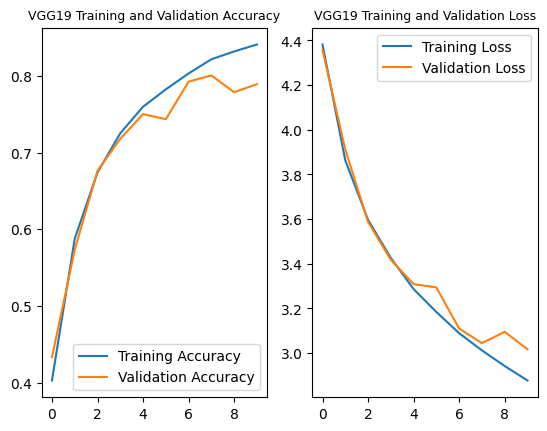

In [12]:
print(history.history.keys())

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('VGG19 Training and Validation Accuracy', fontsize=9)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('VGG19 Training and Validation Loss', fontsize=9)
plt.legend()

plt.show()
